# Mô hình softmax regression và SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("encoded_data.csv")
#df.drop(columns=['Tên SP'], inplace=True)
df.head()

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,0.719322,0.405072,2,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,0.719322,0.405072,2,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,0.652838,0.560227,2,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,0.652838,0.560227,2,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,0.652838,0.560227,2,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


# Chia tập huấn luyện và kiểm tra


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=0)
X_train = df_train.copy()
y_train = X_train.pop("Giá(đ)")

X_test = df_test.copy()
y_test = X_test.pop("Giá(đ)")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1094, 6) (1094,)
(274, 6) (274,)


# Mô hình softmax regression

In [4]:

clf = LogisticRegression(multi_class='multinomial',max_iter= 200,solver='lbfgs')
clf.fit(X_train,y_train) #trainning trên tập dataset

LogisticRegression(max_iter=200, multi_class='multinomial')

In [5]:
y_pred = clf.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on test: 0.84


# Đánh giá hiệu suất mô hình

In [21]:

# Tính precision, recall và F1-score cho từng lớp
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_score_per_class = f1_score(y_test, y_pred, average=None)

# In precision, recall và F1-score cho từng lớp
print("Độ chuẩn xác từng lớp:", precision_per_class)
print("Độ phủ từng lớp:", recall_per_class)
print("F1-score từng lớp:", f1_score_per_class)



Độ chuẩn xác từng lớp: [0.79166667 0.7260274  0.71875   ]
Độ phủ từng lớp: [0.83823529 0.69736842 0.6969697 ]
F1-score từng lớp: [0.81428571 0.7114094  0.70769231]


In [6]:
y_train_pred = clf.predict(X_train)

print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")

Accuracy on train: 0.87


# Ma trận nhầm lẫn của tập kiểm tra và tập huấn luyện

Text(0.5, 1.0, 'Confusion matrix on Test')

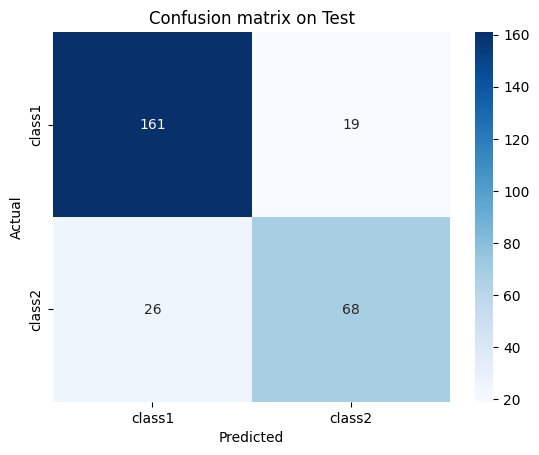

In [8]:
cm = confusion_matrix(y_test,y_pred,labels=[1,2])
sns.heatmap(cm,cmap="Blues",annot=True,fmt='d',xticklabels=['class1', 'class2'], yticklabels=['class1', 'class2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix on Test')

Text(0.5, 1.0, 'Confusion matrix on Train')

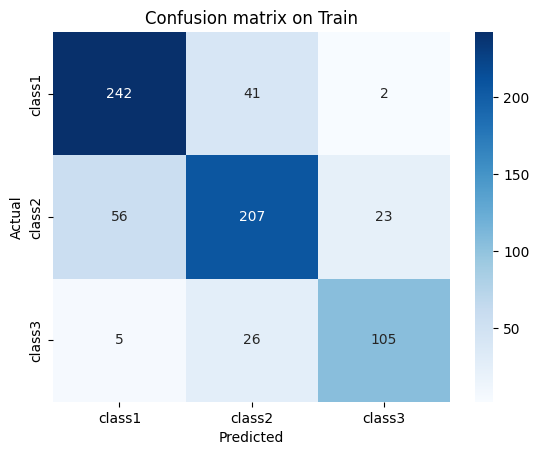

In [20]:
cm = confusion_matrix(y_train,y_train_pred,labels=[1,2,3])
sns.heatmap(cm,cmap="Blues",annot=True,fmt='d',xticklabels=['class1', 'class2', 'class3'], yticklabels=['class1', 'class2', 'class3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix on Train')

# Mô hình SVM

In [9]:
model = SVC(C=1,kernel='rbf')

In [10]:
model.fit(X_train,y_train)

SVC(C=1)

In [11]:
y_pred = model.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on test: 0.84


In [34]:
# Tính precision, recall và F1-score cho từng lớp
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_score_per_class = f1_score(y_test, y_pred, average=None)

# In precision, recall và F1-score cho từng lớp
print("Độ chuẩn xác từng lớp:", precision_per_class)
print("Độ phủ từng lớp:", recall_per_class)
print("F1-score từng lớp:", f1_score_per_class)


Độ chuẩn xác từng lớp: [0.79452055 0.72368421 0.78571429]
Độ phủ từng lớp: [0.85294118 0.72368421 0.66666667]
F1-score từng lớp: [0.82269504 0.72368421 0.72131148]


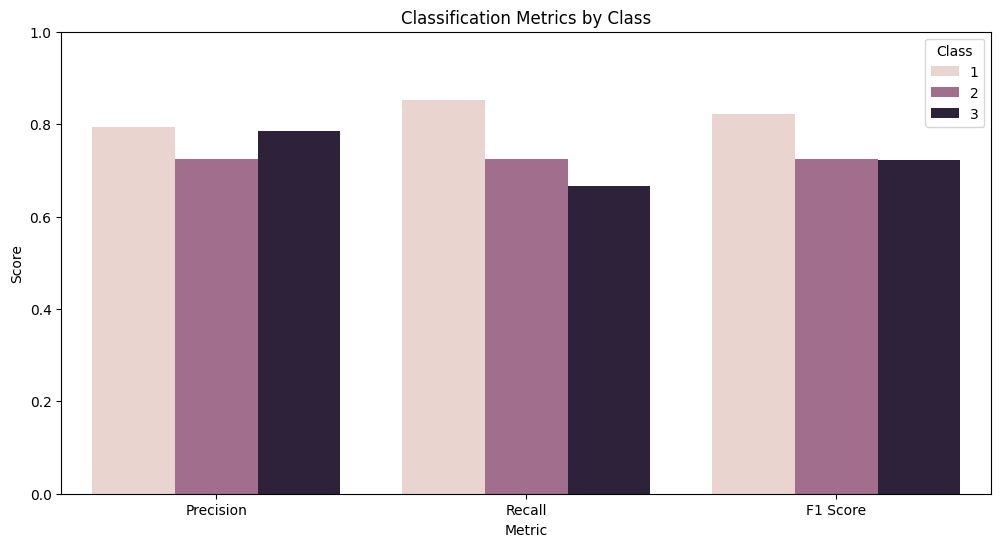

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd





# Tính các chỉ số cho từng lớp
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_score_per_class = f1_score(y_test, y_pred, average=None)

# Tạo danh sách các lớp
classes = [1,2,3]

# Tạo dataframe cho seaborn
data = {
    'Class': np.tile(classes, 3),
    'Metric': ['Precision'] * len(classes) + ['Recall'] * len(classes) + ['F1 Score'] * len(classes),
    'Score': np.concatenate([precision_per_class, recall_per_class, f1_score_per_class])
}
df = pd.DataFrame(data)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=df, dodge=True)
plt.title('Classification Metrics by Class')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Class', loc='best')
plt.show()


In [4]:
K = 3
kmeans = KMeans(K)
kmeans.fit(df)

KMeans(n_clusters=3)

In [6]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df)